In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
round (data.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [4]:
round (data.describe(exclude = ['int64', 'float']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [123]:
data["stroke"] = data["stroke"].astype(bool)
data["hypertension"] = data["hypertension"].astype(bool)
data["heart_disease"] = data["heart_disease"].astype(bool)

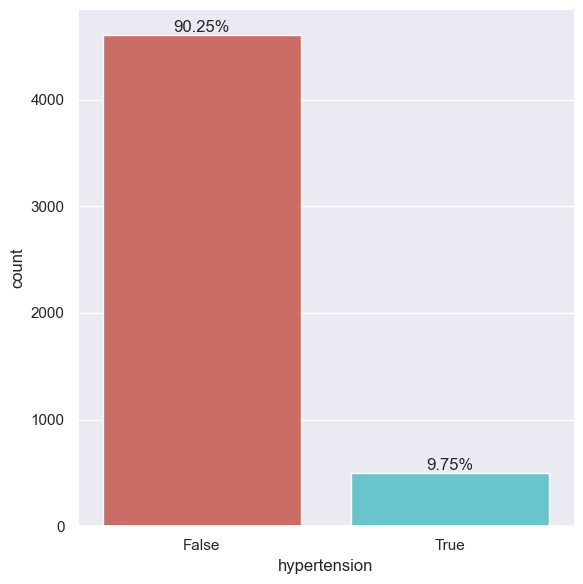

In [124]:
f = sb.catplot(x = "hypertension", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "hypertension")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

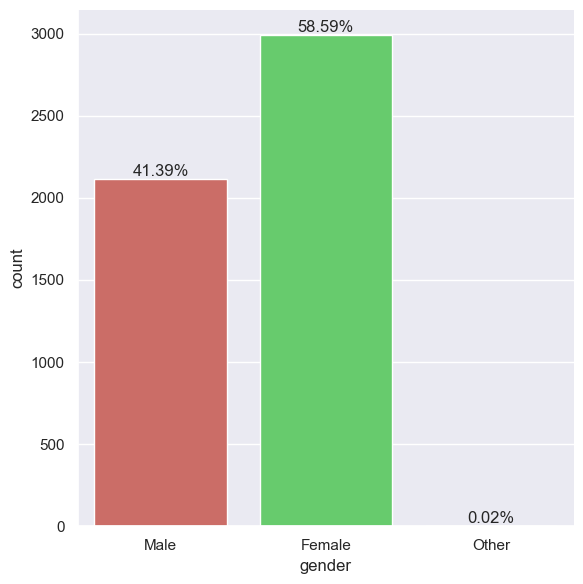

In [129]:
f = sb.catplot(x = "gender", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "gender")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

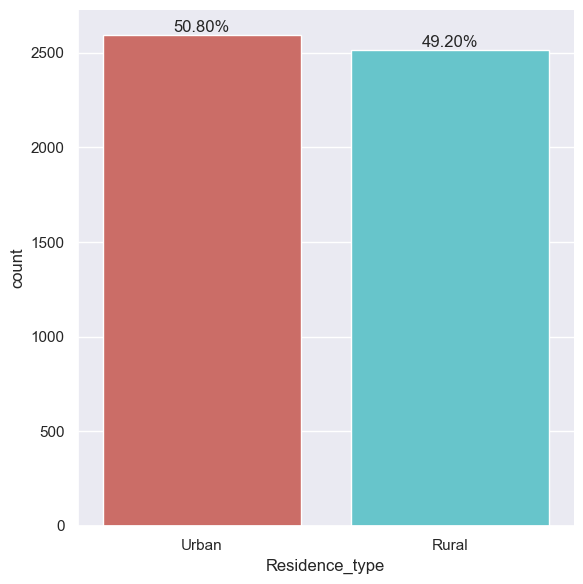

In [127]:
f = sb.catplot(x = "Residence_type", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "Residence_type")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

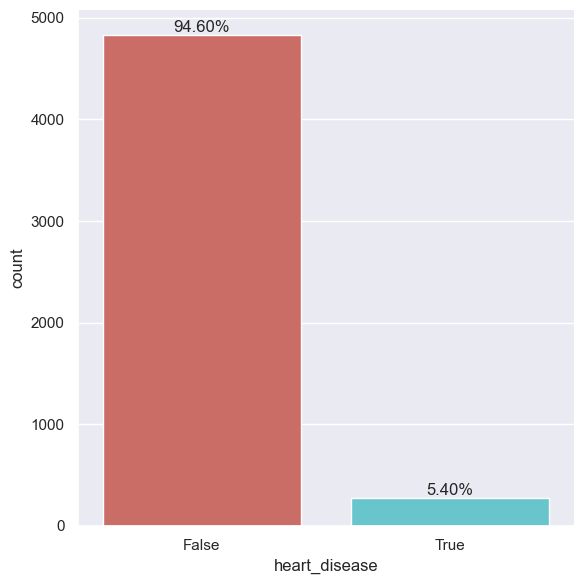

In [125]:
f = sb.catplot(x = "heart_disease", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "heart_disease")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

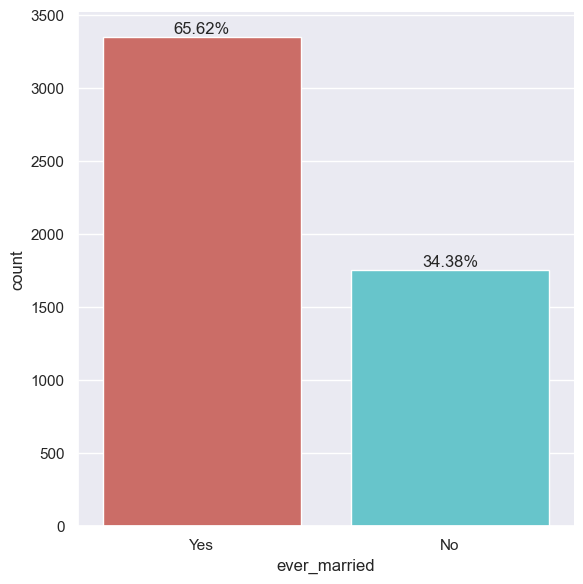

In [128]:
f = sb.catplot(x = "ever_married", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "ever_married")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

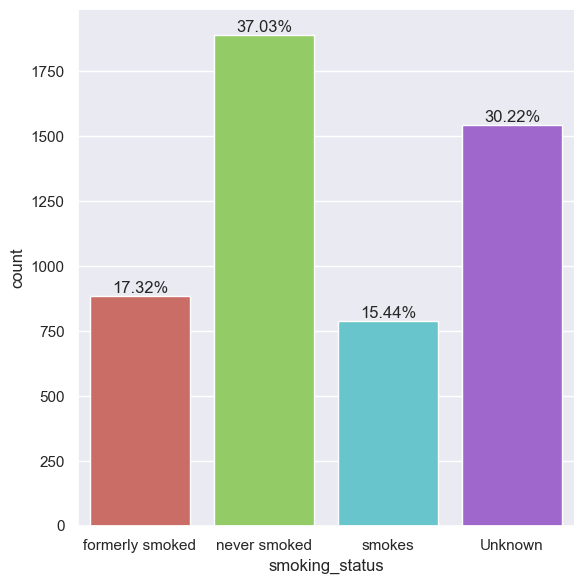

In [130]:
f = sb.catplot(x = "smoking_status", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "smoking_status")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [ ]:
f = sb.catplot(x = "work_type", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "work_type")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

<Axes: xlabel='age'>

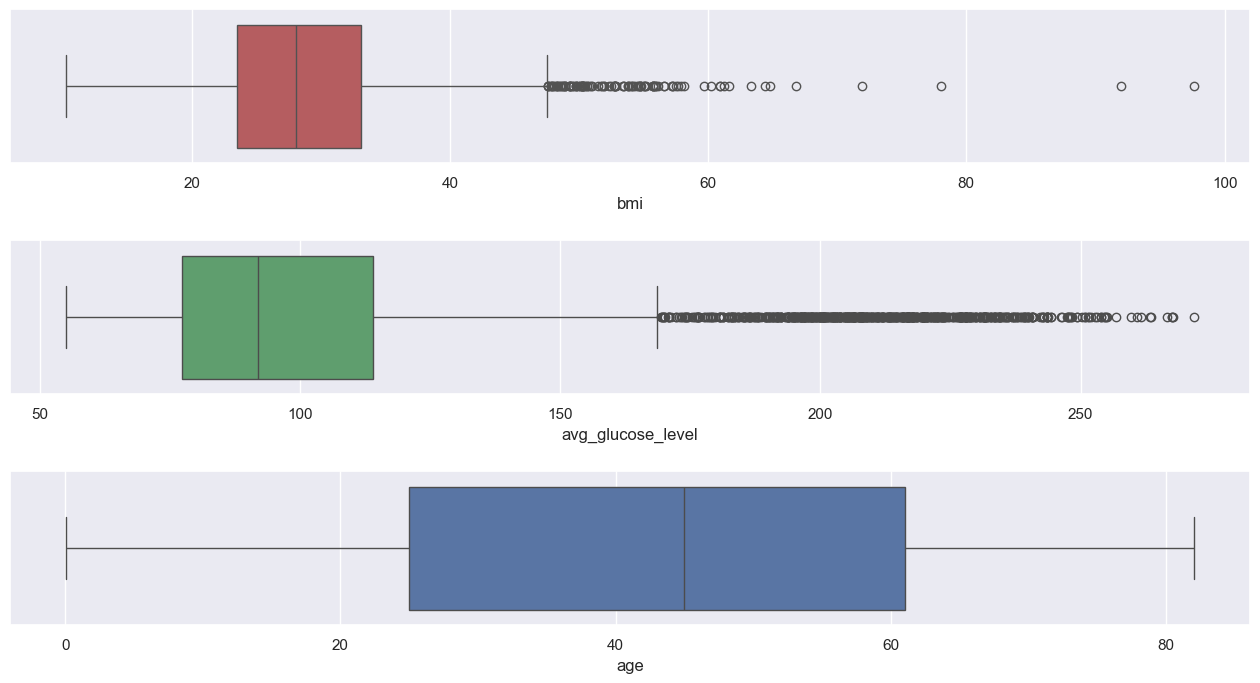

In [69]:
f, axes= plt.subplots(3, 1, figsize=(16, 8))

plt.subplots_adjust(hspace=0.5)
sb.boxplot(data=numdata["bmi"], orient="h", color="r", ax=axes[0])
sb.boxplot(data=numdata["avg_glucose_level"], color="g", orient="h", ax=axes[1])
sb.boxplot(data=numdata["age"], orient="h", color="b", ax=axes[2])

In [72]:
def RemoveOutliers(data):
    for i in data:
        q1 = data[i].describe(include='all').loc['25%']
        q3 = data[i].describe(include='all').loc['75%']
        IQR = q3 - q1
        btmThresh = q1 - 1.5 * IQR
        topThresh = q3 + 1.5 * IQR
        outliers = data[(data[i] < btmThresh) | (data[i] > topThresh)]
        print('Removed', len(outliers), 'outliers from', i)
        cleandata = data.drop(outliers.index)
        return cleandata

In [73]:
glucose = pd.DataFrame(data[["avg_glucose_level"]])
bmi = pd.DataFrame(data[["bmi"]])
age_data = pd.DataFrame(data[["age"]])

bmi.dropna()

glucose_data = RemoveOutliers(glucose)
bmi_data = RemoveOutliers(bmi)

Removed 627 outliers from avg_glucose_level
Removed 110 outliers from bmi


<Axes: >

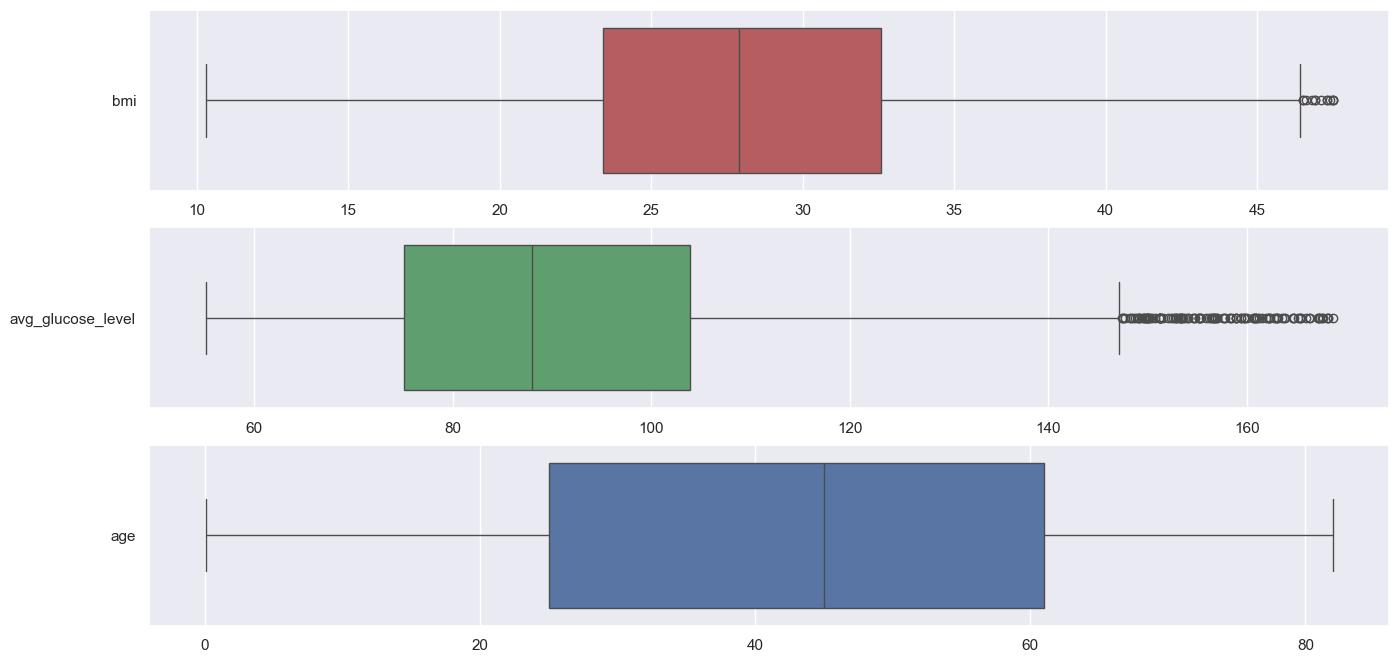

In [100]:
f, axes= plt.subplots(3, 1, figsize=(16, 8))
sb.boxplot(data=bmi_data, orient="h", color="r", ax=axes[0])
sb.boxplot(data=glucose_data, color="g", orient="h", ax=axes[1])
sb.boxplot(data=age_data, orient="h", color="b", ax=axes[2])

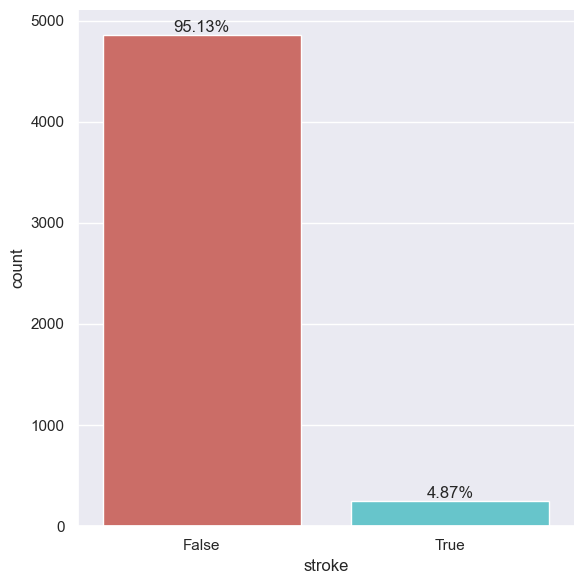

In [120]:
f = sb.catplot(x = "stroke", data = data, kind = "count", height=6, palette="hls", legend=False, hue = "stroke")

ax = f.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()/5110) * 100:.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')